# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [116]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [117]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [74]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [75]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [76]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [77]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

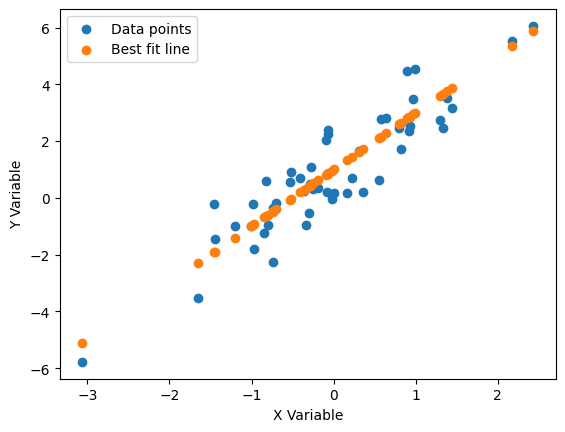

In [78]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [79]:
# Write your own code here

# Create a new dataset
subset_above2 = dataset.query('y >= 2')

# Find the number of rows of the dataset
print(len(dataset))
print(len(subset_above2))

# Find the proportion of the subsetted observation
prop = len(subset_above2)/len(dataset)
print(prop)


50
17
0.34


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [51]:
# Note: abs(...) is the absolute value function
# Write your own code 






# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model (i.e., ordinary least square)

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [119]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov = "HC1") # Robust standard errors

print(summary_col(model.fit()))
print(summary_col(model.fit(cov = "HC1")))
results.params
# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")



                  y    
-----------------------
Intercept      0.9333  
               (0.1295)
x              1.9682  
               (0.1286)
R-squared      0.8300  
R-squared Adj. 0.8265  
Standard errors in
parentheses.

                  y    
-----------------------
Intercept      0.9333  
               (0.1295)
x              1.9682  
               (0.1286)
R-squared      0.8300  
R-squared Adj. 0.8265  
Standard errors in
parentheses.


Intercept    0.933285
x            1.968189
dtype: float64

<font size = "5">

Compute the estimated best fit line

In [82]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)   # The true mean is beta0 = 1, beta1 = 2, so it is very close

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    0.933285
x            1.968189
dtype: float64


<font size = "5">

Plot the best fit line

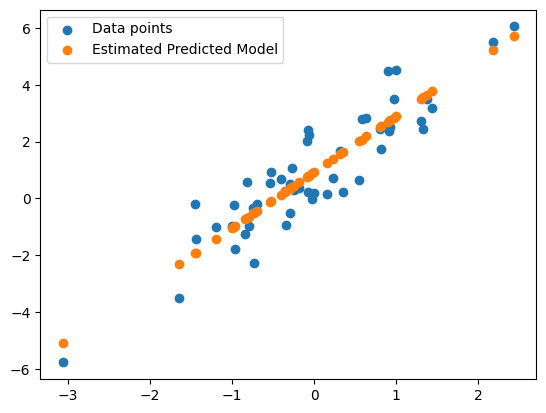

In [105]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

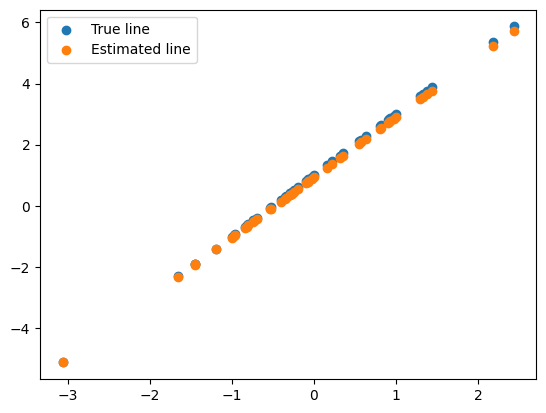

In [111]:
# Write your own code

# Create an overlapping scatterplots
plt.scatter(x=dataset['x'], y = dataset['p'])
plt.scatter(x=dataset['x'], y = dataset['p_estimated'])

plt.legend(['True line','Estimated line']) # Extrapolation was obserserved


<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [109]:
# Write your own code

sample_error = dataset['y'] - dataset['p_estimated']
fn_pos_error = lambda e: e >= 0

dataset['positive_error'] = sample_error.apply(fn_pos_error)
display(dataset)


,x,e,y,p,p_estimated,positive_error
0,-0.296573,-0.928383,-0.521529,0.406854,0.349573,False
1,-0.246838,-0.211017,0.295307,0.506323,0.447461,False
2,0.898144,1.688752,4.485039,2.796288,2.701002,True
3,-1.444477,0.453055,-1.435899,-1.888955,-1.909719,True
4,1.376000,-0.246887,3.505113,3.751999,3.641512,False
5,0.225763,-0.746955,0.704571,1.451526,1.377630,False
6,0.002963,-0.827279,0.178646,1.005925,0.939116,False
7,0.356819,-1.503933,0.209705,1.713638,1.635572,False
8,-0.733986,-1.800443,-2.268415,-0.467972,-0.511338,False
9,0.638027,0.548918,2.824971,2.276053,2.189042,True


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [97]:
# Write your own code

# Compute the square of error
error_sqr = sample_error ** 2
print(error_sqr.mean()) # MSE, what is the differece between MSE and residual sum of error


0.8052374112310643
